In [1]:
import numpy as np
from processing_functions import * 

import os
os.chdir('../') # Go to the parent folder
from support_functions import *
from PCA_Functions import *
os.chdir('Synthetic_3')

Using TensorFlow backend.


## Define Parameters

In [2]:
k = 50 # Used to compute the precision @ k

## Read Datasets

In [3]:
data, labels, data_train, data_test, labels_train, labels_test = read_data()

## PCA Method

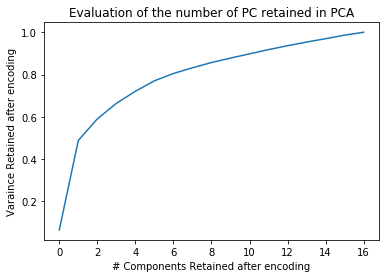

In [4]:
evaludate_pc(data,labels)

In [5]:
# Define the number of Principal Components to keep from the image
n_components  = 12

# Compute PCA with the normal data only
data_pca,pca_matrix, component_mean = pca_all_processes(data,labels,n_components)

93.6% variance is retained with the current PCA Encoding.


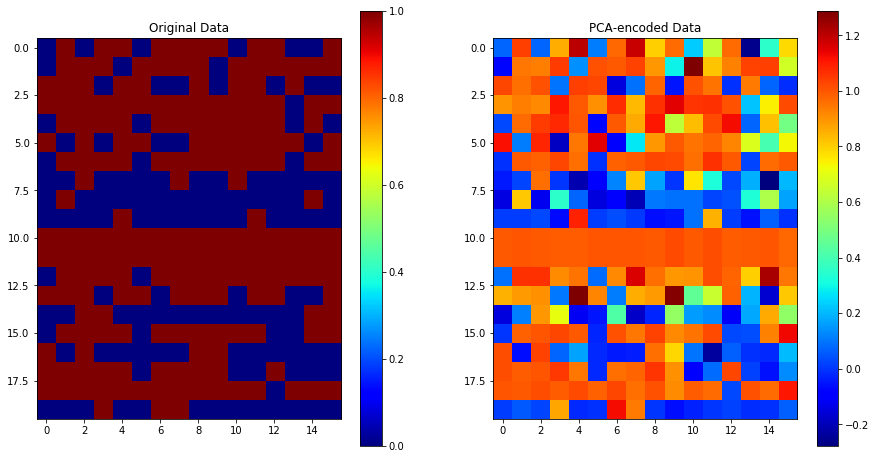

In [6]:
# Compare the original and encoded dataset
compare_var(data, data_pca, to_print = True)
plot_2datasets(data[:20],data_pca[:20],'Original Data', 'PCA-encoded Data')

## Anomaly Detection with Reconstruction Error

In [7]:
# Reconstruct the training and test set
data_train_pca = reconstruct_with_pca(data_train, component_mean,pca_matrix,n_components)
data_test_pca = reconstruct_with_pca(data_test, component_mean,pca_matrix,n_components)

The higher the reconstruction error, the more likely the point will be an anomaly


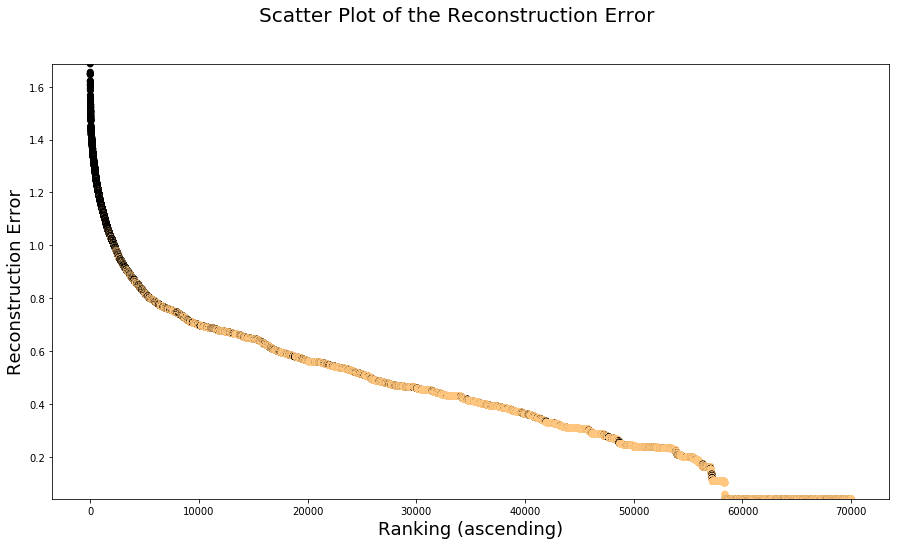

Training Results:
Precision: 62.5%
Recall: 49.7%
F-score: 55.4%
R-Precision (# R = 6969.0): 62.5%
Precision@50: 100.0%

Testing Results:
Precision: 63.7%
Recall: 50.4%
F-score: 56.3%
R-Precision (# R = 3031.0): 63.7%
Precision@50: 100.0%


In [8]:
train_test_with_reconstruction_error(data_train, data_train_pca, data_test, data_test_pca, labels_train, labels_test,k)